### Time Series Analysis in Python with FaceBook Prophet
+ Time series : Time series analysis is the collection of data at specific intervals over a period of time, 
+  With the purpose of identifying trends, cycles, and seasonal variances to aid in the forecasting of a future event.

#### Applications
+ To identify trends or patterns
+ To identify seasonal changes and cycles
+ To understand the past in order to predict the future
+ For forecasting future events,outcomes 
- Ex
  -useful for forecasting market for products that fluctuate seasonally, such as commodities and clothing retail businesses
  - For stock rise or fall predictions
  - 
  
![](timeseries_patterns.jpeg)
 
 
#### Packages
+ pandas
+ statsmodel
+ fbprophet
+ pmprophet
+ pyflux

#### Installing
+ pip install pystan
+ pip install fbprophet
+ conda install -c conda-forge fbprophet


![](facebookprophet.png)

### Reformat Data to set dates as index
+ Method 1: When Reading the File
    - pd.read_csv('dataset.csv',parse_dates=['Dates'],index_col='Dates')
+ Method 2 : Using set_index 
    - df.set_index(pd.DatetimeIndex(df['Dates']))

In [3]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load Our Dataset
df = pd.read_csv("flights_data.csv")

In [5]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [6]:
# Shape of Dataset
df.shape

(36, 2)

In [7]:
# Quick Profiling
import pandas_profiling as pp

In [8]:
# Generate A Profile Report
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/base.py:173: UserWarning: Column "Dates" appears to be containing only date/datetime values. You might consider changing the type to datetime (pd.to_datetime())
  "changing the type to datetime (pd.to_datetime())".format(series.name)


#### Check to See if our dataset is Stationary
+ Visual Plot Test
+ Summary of Stats
+ AD Fuller Test(null)
    - determine the presence of unit root in the series
    - null hypothesis and alternate hypothesis
    - test stats < critical value is stationary 
+ KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)

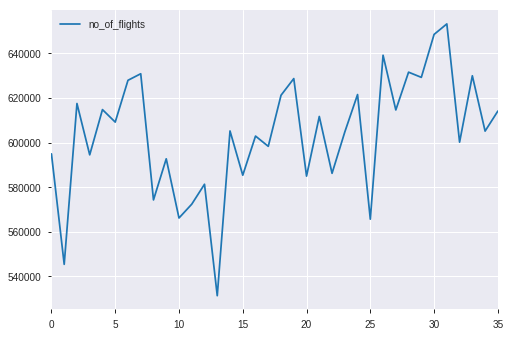

In [9]:
# Plot Test
df.plot()

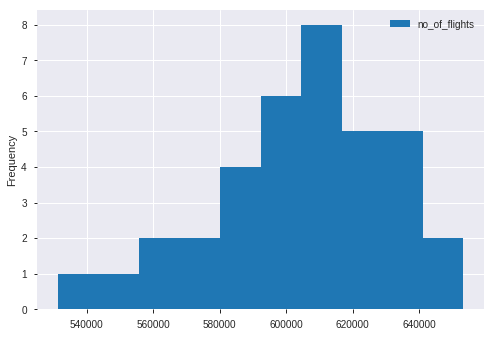

In [10]:
# Histogram
df.plot(kind="hist")

#### Narrative
+ Not a gaussian bell curve not stationary

### Summary Stats
+ Split
+ Find mean and variance of each

In [12]:
df.shape

(36, 2)

In [13]:
df.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [14]:
# Create A Series
X = df['no_of_flights'].values

In [15]:
# Split our dataset
len(X)/2

18.0

In [16]:
X1, X2 = X[0:18], X[18:]

In [18]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=591385.1111111111, mean2=616155.6111111111
variance1=667492396.6543211, variance2=485281695.4598766


#### Narrative
+ Not Stationary since the variance are not in the same range

### Augment Dickey Fuller Test


In [20]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adf_test(timeseries):
    print ('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value {}'.format(key)] = value
    print (df_output)

In [25]:
adf_test(df['no_of_flights'])

Results of Aug. Dickey-Fuller Test:
Test Statistic                 -0.693138
p-value                         0.848519
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value 1%              -3.723863
Critical Value 5%              -2.986489
Critical Value 10%             -2.632800
dtype: float64


#### Narrative
+ Test Stats is -0.69 which is greater than Critical Value at all point hence it is not 
+ Not Stationary

In [28]:
def is_stationary(stats,critical_value):
    if stats < critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")

In [29]:
is_stationary(-0.693138,-3.723863)

Not Stationary


#### KPSS Test
+ Opposite of AD Fuller

In [30]:
# Load Pkg
from statsmodels.tsa.stattools import kpss

In [36]:
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value {}'.format(key)] = value
    print (kpss_output)

In [37]:
kpss_test(df['no_of_flights'])

Results of KPSS Test:
Test Statistic          0.333669
p-value                 0.100000
Lags Used              10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


#### Narrative
+ If test is greater than critical value it is stationary

In [38]:
def is_stationary_kpss(stats,critical_value):
    if stats > critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")

In [39]:
is_stationary_kpss(0.333669,0.347000)

Not Stationary


### How to Make it Stationary
+ Difference 
    - df.diff
    - yt = yt -y(t-1)
    - df['diff'] = df['a'] - df['a'].shift(1)
+ Log Transformation :to stabilize the non consistence values
    - using numpy.log()

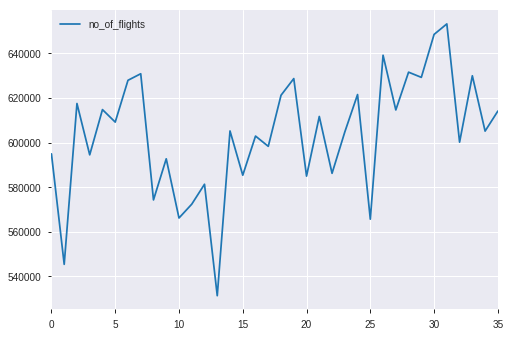

In [40]:
df.plot()

In [42]:
df2 = df

In [43]:
# Reformat
df2.set_index(pd.DatetimeIndex(df2['Dates']))

,Dates,no_of_flights
Dates,,
2005-01-01,2005-01-01,594924
2005-02-01,2005-02-01,545332
2005-03-01,2005-03-01,617540
2005-04-01,2005-04-01,594492
2005-05-01,2005-05-01,614802
2005-06-01,2005-06-01,609195
2005-07-01,2005-07-01,627961
2005-08-01,2005-08-01,630904
2005-09-01,2005-09-01,574253


In [44]:
df2.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [47]:
df2 = df2.drop('Dates',axis=1)

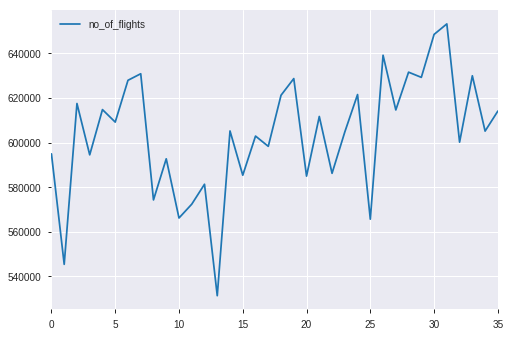

In [48]:
df2.plot()

In [49]:
df2.columns

Index(['no_of_flights'], dtype='object')

### Method 1 :Differencing To Fix Non Stationary Dataset

In [50]:
# Differencing To Fix Non Stationary Dataset
df2['no_of_flights'] = df2['no_of_flights'] - df2['no_of_flights'].shift(1)

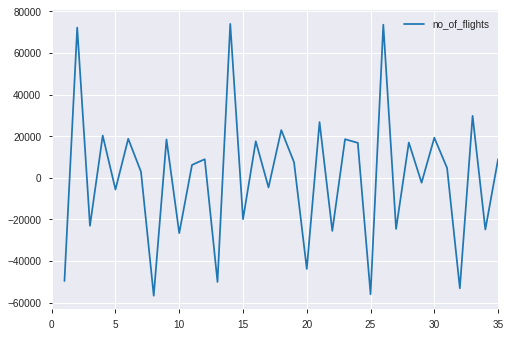

In [51]:
df2.plot()

In [52]:
### Using Pandas Diff on Dataset with DatetimeIndex
df_diff = df2.diff(periods=1)

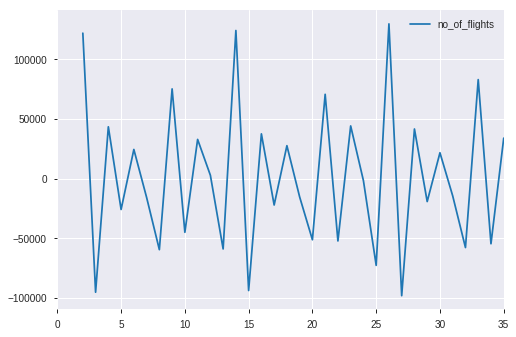

In [53]:
df_diff.plot()

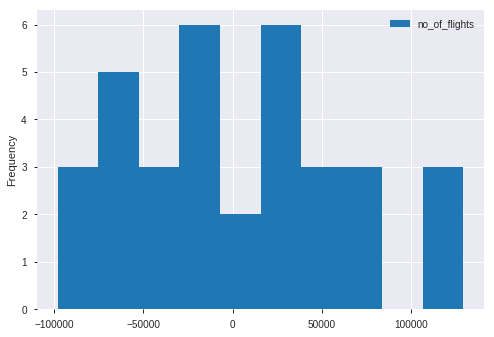

In [54]:
df_diff.plot(kind='hist')

#### Narrative
+ Our Dataset is now stationary

###  Method 2 : Log Transform

In [55]:
# Load Pkgs
import numpy as np

In [56]:
df3 = df

In [57]:
X2 = df3['no_of_flights']

In [58]:
trans_df = np.log(X2)

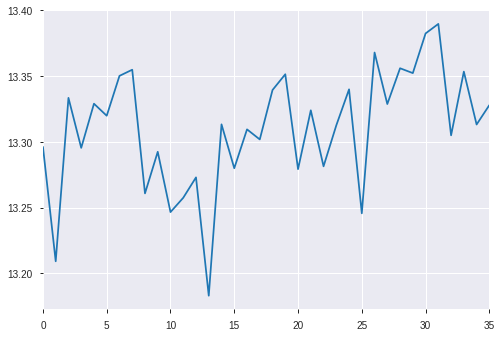

In [59]:
trans_df.plot()

### Decompose our Dataset 
+ To Find Trends,Seasonality


In [60]:
# Load Stats Pkgs
import statsmodels.api as sm

In [65]:
df_n = pd.read_csv('flights_data.csv',parse_dates=['Dates'],index_col='Dates')

In [66]:
df_n.head()

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [68]:
# Set Date Col to Index
df_n.dtypes

no_of_flights    int64
dtype: object

In [69]:
# Makes it Easier to Manipulate by Time/Date
df_n['2005']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


In [70]:
# We Can select by range of years
df_n['2005':'2006']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


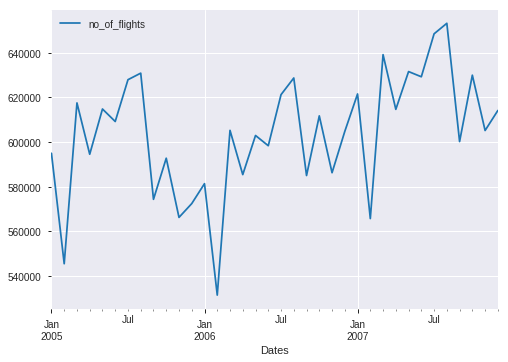

In [71]:
# Good Plot
df_n.plot()

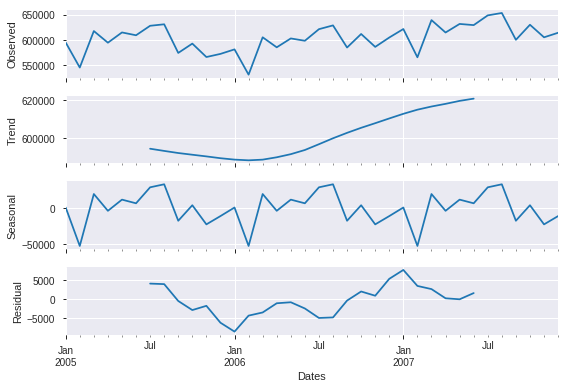

In [72]:
#### Decomposition Plot
decomposition = sm.tsa.seasonal_decompose(df_n, model='additive')
fig = decomposition.plot()

### Intro To Facebook Prophet
+ Steps
    - Initialize Model :: Prophet()
    - Set columns as ds,y
    - Fit dataset :: Prophet().fit()
    - Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
    - Predict :: Prophet().predict(future_dates)  
    - Plot :: Prophet().plot(predictions)

In [73]:
df_n

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


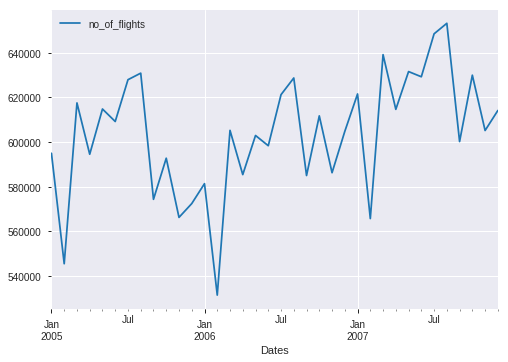

In [74]:
# Plot
df_n.plot()

In [75]:
# Make it stationary
sdf = df_n.diff(periods=1)

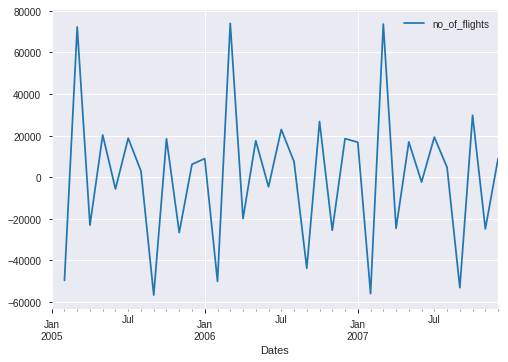

In [76]:
sdf.plot()

### Building Model

In [77]:
# load Timeseries Pkgs
from fbprophet import Prophet

In [78]:
# Initialize the Model
m = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality:additive/multiplicative
+ holidays:
+ changepoint:

In [91]:
sdf

,no_of_flights
Dates,
2005-01-01,NaN
2005-02-01,-49592.0
2005-03-01,72208.0
2005-04-01,-23048.0
2005-05-01,20310.0
2005-06-01,-5607.0
2005-07-01,18766.0
2005-08-01,2943.0
2005-09-01,-56651.0


In [92]:
# Make the index as ds
sdf['ds'] = sdf.index

In [93]:
sdf.columns

Index(['no_of_flights', 'ds'], dtype='object')

In [94]:
# Works with a ds and y column names
sdf.rename(columns={'ds':'ds','no_of_flights':'y'},inplace=True)

In [95]:
sdf.head()

,y,ds
Dates,,
2005-01-01,NaN,2005-01-01
2005-02-01,-49592.0,2005-02-01
2005-03-01,72208.0,2005-03-01
2005-04-01,-23048.0,2005-04-01
2005-05-01,20310.0,2005-05-01


In [96]:
new_df = sdf[['ds','y']]

In [97]:
new_df.head()

,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0


In [98]:
# Fit our Mode to our Data
m.fit(new_df)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


In [99]:
# Create Future Dates of 360 days
future_dates = m.make_future_dataframe(periods=365)

In [101]:
future_dates.head()

,ds
0,2005-01-01
1,2005-02-01
2,2005-03-01
3,2005-04-01
4,2005-05-01


In [102]:
# Shape of Dataset
new_df.shape

(36, 2)

In [103]:
# Shape after adding 365 days
future_dates.shape

(401, 1)

In [104]:
# Make Prediction with our Model
prediction = m.predict(future_dates)

In [105]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,-1277.791087,7655.959773,15047.776652,-1277.791087,-1277.791087,12609.171555,12609.171555,12609.171555,12609.171555,12609.171555,12609.171555,0.0,0.0,0.0,11331.380468
1,2005-02-01,-1165.542097,-56008.458888,-49040.428879,-1165.542097,-1165.542097,-51229.325339,-51229.325339,-51229.325339,-51229.325339,-51229.325339,-51229.325339,0.0,0.0,0.0,-52394.867436
2,2005-03-01,-1064.155913,67978.176209,75082.697388,-1064.155913,-1064.155913,72711.688639,72711.688639,72711.688639,72711.688639,72711.688639,72711.688639,0.0,0.0,0.0,71647.532726
3,2005-04-01,-951.906923,-26938.029106,-19691.136088,-951.906923,-951.906923,-22409.048094,-22409.048094,-22409.048094,-22409.048094,-22409.048094,-22409.048094,0.0,0.0,0.0,-23360.955017
4,2005-05-01,-843.278873,13683.148416,20974.750191,-843.278873,-843.278873,18062.172577,18062.172577,18062.172577,18062.172577,18062.172577,18062.172577,0.0,0.0,0.0,17218.893703


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

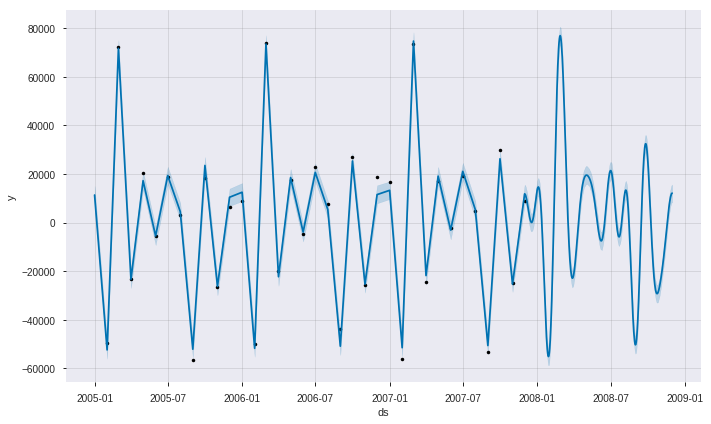

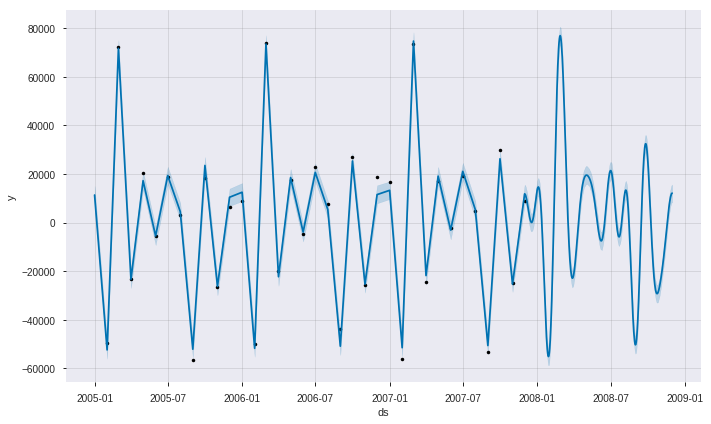

In [106]:
# Plot Our Predictions
m.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

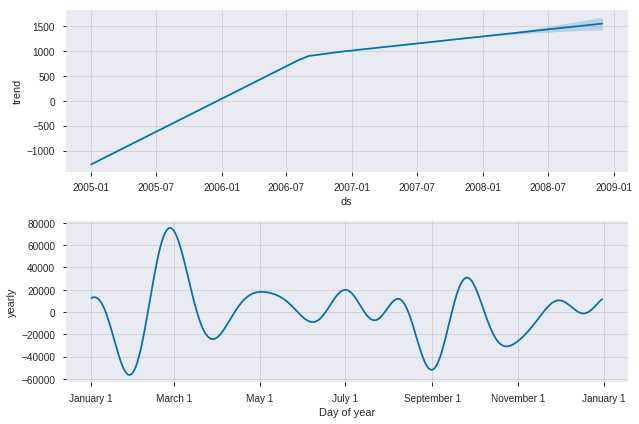

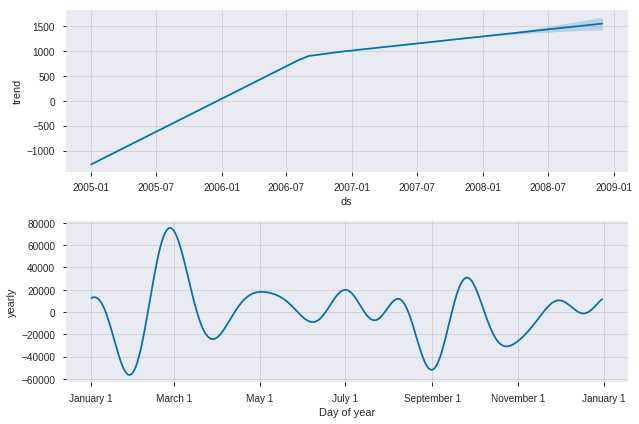

In [107]:
# Visualize Each Component [Trends,Weekly]
m.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial:the size of the initial training period
+ period : the spacing between cutoff dates
+ horizon : the forecast horizon

In [108]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [109]:
new_df.shape

(36, 2)

In [110]:
cv = cross_validation(m,initial='36 days',period='180 days',horizon="365 days")

In [111]:
# View CV Data
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,1.948018e+05,1.948018e+05,1.948018e+05,18766.0,2005-06-09
1,2005-08-01,2.467115e+05,2.467115e+05,2.467115e+05,2943.0,2005-06-09
2,2005-09-01,-1.478723e+06,-1.478723e+06,-1.478723e+06,-56651.0,2005-06-09
3,2005-10-01,7.975796e+05,7.975796e+05,7.975796e+05,18459.0,2005-06-09
4,2005-11-01,-1.422165e+06,-1.422165e+06,-1.422165e+06,-26574.0,2005-06-09


#### Performance Metrics


In [112]:
from fbprophet.diagnostics import performance_metrics

In [113]:
df_perf = performance_metrics(cv)

In [114]:
df_perf.head()

,horizon,mse,rmse,mae,mape,coverage
36,31 days,2.360641e+10,153643.779575,107080.589795,9.390467,0.25
1,53 days,3.071503e+10,175257.040266,124013.765055,27.752806,0.25
13,57 days,1.519668e+10,123274.807990,70278.591188,20.897181,0.25
25,58 days,1.519676e+10,123275.157531,70374.301170,20.915781,0.25
37,62 days,1.529483e+10,123672.252793,75285.556365,21.001878,0.00


### Visualizing Performance Metrics

In [115]:
from fbprophet.plot import plot_cross_validation_metric

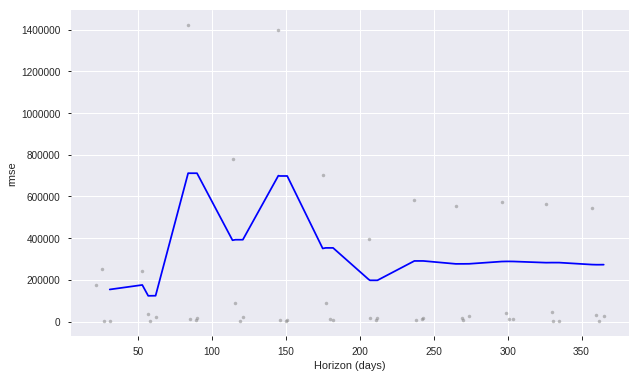

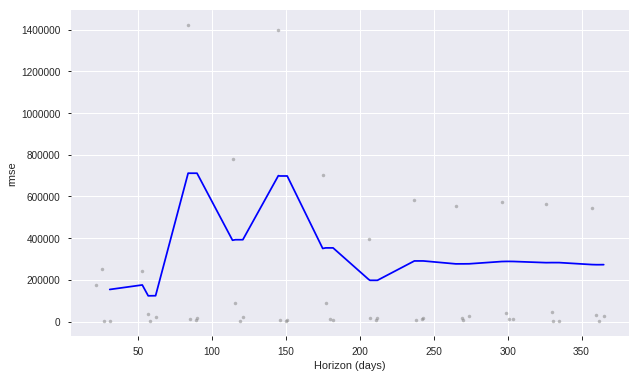

In [116]:
plot_cross_validation_metric(cv,metric='rmse')

### Working With Non Stationary Data

In [118]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [119]:
# Non Stationary
ns_df = df

In [120]:
# Works with a ds and y column names
ns_df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)

In [121]:
ns_df.head()

,ds,y
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


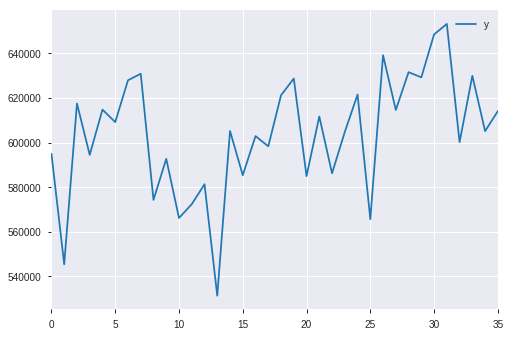

In [122]:
ns_df.plot()

In [123]:
# Build our model
model2 = Prophet()

In [124]:
# Fit our Mode to our Data
model2.fit(ns_df)

In [125]:
# Create Future Dates of 360 days
future_dates2 = model2.make_future_dataframe(periods=365)

In [126]:
# Make Prediction with our Model
prediction2 = model2.predict(future_dates2)

In [127]:
prediction2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,593354.402493,593317.302628,595984.752858,593354.402493,593354.402493,1269.254925,1269.254925,1269.254925,1269.254925,1269.254925,1269.254925,0.0,0.0,0.0,594623.657418
1,2005-02-01,595188.693359,544226.191968,547026.535242,595188.693359,595188.693359,-49660.737932,-49660.737932,-49660.737932,-49660.737932,-49660.737932,-49660.737932,0.0,0.0,0.0,545527.955426
2,2005-03-01,596845.472178,616192.959153,618965.117533,596845.472178,596845.472178,20781.173211,20781.173211,20781.173211,20781.173211,20781.173211,20781.173211,0.0,0.0,0.0,617626.645390
3,2005-04-01,598679.772021,593966.721720,596704.564925,598679.772021,598679.772021,-3324.253038,-3324.253038,-3324.253038,-3324.253038,-3324.253038,-3324.253038,0.0,0.0,0.0,595355.518982
4,2005-05-01,600454.922042,613429.406262,616173.413548,600454.922042,600454.922042,14353.609932,14353.609932,14353.609932,14353.609932,14353.609932,14353.609932,0.0,0.0,0.0,614808.531973


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

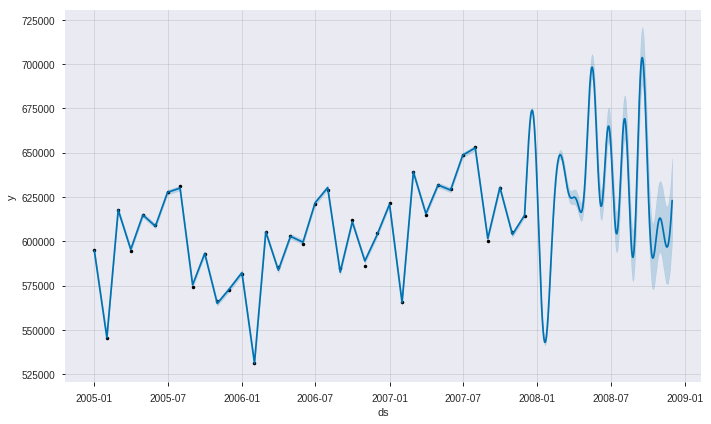

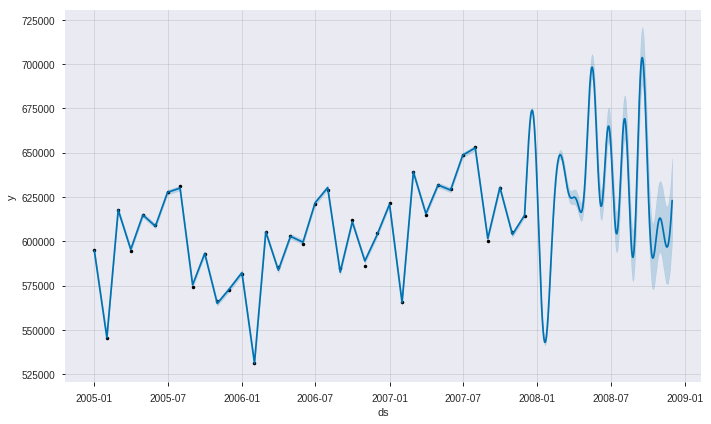

In [128]:
# Plot Our Predictions
model2.plot(prediction2)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

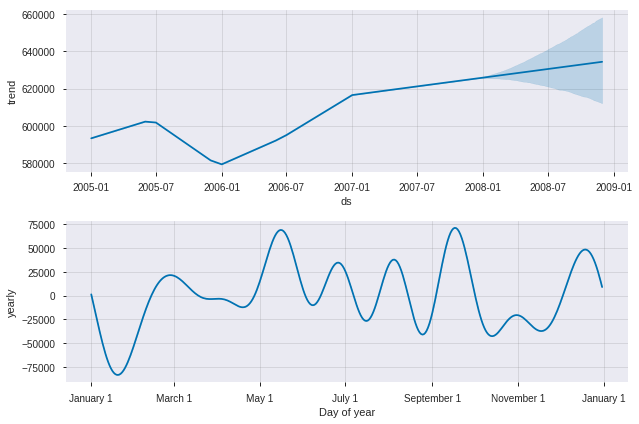

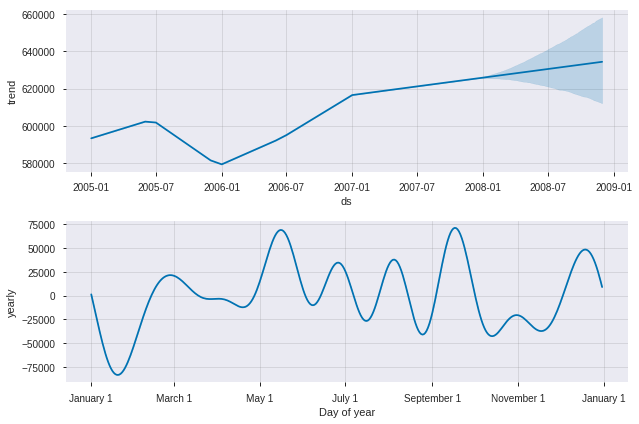

In [129]:
# Visualize Each Component [Trends,Weekly]
model2.plot_components(prediction2)

In [130]:
#### Thanks For watching
# Jesus Saves @JCharisTech
# Jesse E.Agbe(JCharis)
# J-Secur1ty